In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df = pd.read_excel('C:/Users/efe44/Desktop/veri madenciliği proje/Clustered_OnlineRetail.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
 8   Cluster      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 37.2+ MB
None


In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Cluster  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom        4  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom        4  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom        4  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom        4  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom        4  


In [4]:
features = ["StockCode", "Quantity", "UnitPrice", "InvoiceDate", "CustomerID", "Country", "Cluster"]
data = df[features]

In [5]:
label_encoder = LabelEncoder()
data['StockCode'] = label_encoder.fit_transform(data['StockCode'])
data['Country'] = label_encoder.fit_transform(data['Country'])
data['InvoiceDate'] = label_encoder.fit_transform(data['InvoiceDate'])

print(data.head())

   StockCode  Quantity  UnitPrice  InvoiceDate  CustomerID  Country  Cluster
0       3536         6       2.55            0       17850       36        4
1       2794         6       3.39            0       17850       36        4
2       3044         8       2.75            0       17850       36        4
3       2985         6       3.39            0       17850       36        4
4       2984         6       3.39            0       17850       36        4


C:\Users\efe44\AppData\Local\Temp\ipykernel_14276\1162928379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['StockCode'] = label_encoder.fit_transform(data['StockCode'])
C:\Users\efe44\AppData\Local\Temp\ipykernel_14276\1162928379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = label_encoder.fit_transform(data['Country'])
C:\Users\efe44\AppData\Local\Temp\ipykernel_14276\1162928379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [6]:
X = data.drop('Cluster', axis=1)
Y = data['Cluster']

In [7]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.15, random_state=44, stratify=Y)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=11)

In [10]:
Y_pred = knn.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy:  0.9331012338996395
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     15768
           1       0.97      0.98      0.98     14565
           2       0.90      0.88      0.89     15627
           3       0.95      0.96      0.95      9092
           4       0.97      0.97      0.97      6290
           6       0.99      0.99      0.99      5070
           7       0.93      0.94      0.93     14875

    accuracy                           0.93     81287
   macro avg       0.94      0.94      0.94     81287
weighted avg       0.93      0.93      0.93     81287



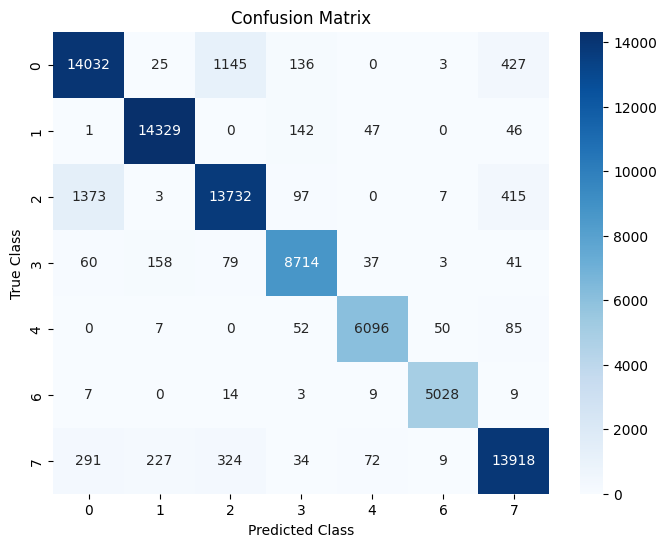

In [11]:
cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()